In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

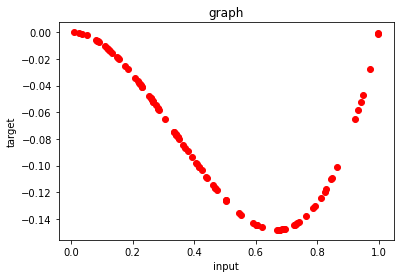

In [ ]:
x = np.random.rand(100)     #randomly generates an array with 100 numbers between 1 and 0
t = np.empty(100)           #generates array t

for i in range(100):        #fills array t
  t[i] = x[i]**3-x[i]**2 

#generates graph
plt.title("graph")
plt.xlabel("input")
plt.ylabel("target")
plt.scatter(x, t, color ="red") #plots the points (without connection!!!!!)
plt.show()






### ALLE .NAME ZU .SELF!!! => RESULT: MATRIX MULTIPICATION NOT WORKING :(( (l.30) - FLASCHER INPUT - ECKIGER KLAMMERN IN Z. 21 ENTFERNT
### MAN AKTIVIERT DIE ZEILENNUMMER UNTER TOOLS - SETTINGS BTW
### (3) NEUER FEHLER - YAY: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
### Wenn man die klammern hinter einem funktionsaufruf weglässt übergibt python anscheinend die funktion undd nicht den tatsächlichen wert
### belastender weise bekommt man jetzt zwar duch get_activation tatsächlich einene vektor, aber der ist leeer...
### (4) hier haben wir den neuen Fehler: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 0)
### (5)'Layer' object has no attribute 'bias' (34)
### (6) operands could not be broadcast together with shapes (10,) (0,)  (35)

In [ ]:
from numpy.core.fromnumeric import var
#the layer class
class Layer(object):
  n_units = 0
  input_units = 0
  learningRate = 0.04
  weight = [0]          #### CHANGED [0][0] TO [0] - DOESNT DO ANYTHINF :(
  layer_activation = [] ### 3 ADDAD THISS SO IT STARTS EXISTING
  bias = []  ### 5 ADDAD THISS SO IT STARTS EXISTING - NEURER FEHLER
  reulStich = []
  layer_input = []
  layer_preactivation = []


  #constructor 
  def __init__(self, units, preceding_units, previousActivation):
      #number of layers n_units
      self.n_units = units
      #number of units in the preceding layer input_units
      self.input_units = preceding_units
      #bias vector: n-units = 0
      ### 5 Vor DEN BIAS EIN SELF GESCHRIEBEN
      self.bias = np.empty(units)   
      #weight matrix: n-inputs, n-units = random
      self.weight = np.random.rand(preceding_units, units) 
      #initialisierung 
      self.layer_input = previousActivation;
      self.layer_preactivation = np.empty(units);
      ### 3 MOVED LAYER ACTIVATION TO UNDER THE CLASS BC THERE ARE CLAIMS IT DOESSNT EXIST
      self.layer_activation = np.empty(units);
      self.reulStich =  np.empty(units)
      
#layer_input, bias, weight, n_units, layer_activation
  # returns each units activation using RELU
  def forward_step(self, layer_input):
    # layer_preactivation = input for the activation function
    ### 5 SIEHE EXPERIMENTE matrixmultiplikation, ganz unten
    ### vielleicht der falsche datentyp, wir probieren mal aus es explizit zu einem np array zu machen
    a = np.array(layer_input)
    b = np.array(self.weight)
    c =  np.matmul(a,b) 
    self.layer_preactivation = c + self.bias
    #calculates the activation
    for y in range(self.n_units):
      if( self.layer_preactivation[y] > 0):
        self.layer_activation[y] = self.layer_preactivation[y]
      else:
        self.layer_activation[y] = 0
    return  self.layer_activation

  #rechnet die Ableitung der Relufunktion für alle activations aus
  def reluStrich(self):
    for y in range(self.n_units):
      if( self.layer_activation[y] > 0):
        self.reulStich[y] = 1
      else: 
        self.reulStich[y] = 0

    return self.reulStich
    #zum Erstellen in Zukunft zugreifen auf den prev

  ### 3 HERE IS THE PROBLEM RN I THINK, IF I ADD SELF ITS NOT DOESNT WANT TO SHARE ITS VALUE; AND IF IT IS MISSING; THEN ITS ALSO NOT HAPPY  
  ### 3 TRIED TO CHANGE IT BY MAKING IT A CLASS FUNKTION CLS; NICHT SICHER OB DAS ETWAS ÄNDERT
  def get_layerActivation(cls):
    return cls.layer_activation

  def backward_step(self, next_activation, index):
    #partial derivative of the Lossfunction with respect to the activation
    #
    dLosstA = next_activation - t[index]
    # ableitung relu 
    dRelu = self.reluStrich()
    #b= (np.array(self.layer_input)).T * 2
    #print(b)
    #calculate the gradient
    #print("Dot Product dRelu und dLosstA")
    #print((np.dot(dRelu, dLosstA)).shape)
    #print("input transponiert")
    #print(((np.array(self.layer_input)).T).shape)
    #np.dot(dRelu, dLosstA)
    gradientWeight = (np.array(self.layer_input)).T * a
    #calculate the weight gradient 
    #np.dot(dRelu, dLosstA)
    gradientBias = dRelu * dLosstA
    #partial derivative of the Lossfunction with respect to the layer_input
    dLosstI = (dRelu  * dLosstA) @ (np.array(self.weight)).T
    #updaten weight and bias
    self.weight = self.weight - self.learningRate * gradientWeight
    self.bias = self.bias - self.learningRate * gradientBias 


In [ ]:
class MLP(object):
    #constructor 
  listLayer = []
  units_per_layer = []
  

  def __init__(self,units_per_layer, input):
    inputLayer = Layer(units_per_layer[0], 1, [input])
    self.listLayer.append(inputLayer)
    self.units_per_layer = units_per_layer 

    for i in range (len(self.units_per_layer)-1):
        ### 4 KLAMMERN HINTER FUNKTIONSAUFRUF HINZUGEFÜGT
        layer = Layer(self.units_per_layer[i+1], self.units_per_layer[i], [self.listLayer[i-1].get_layerActivation()])
        self.listLayer.append(layer)

  def forward_step(self, indiinput):
    ### 4 SETZE ACTIVATION FÜR DEN INPUT LAYER AUF DEN INPUT. ICH HOFFE DAS IST KEIN BS...
    MLP.listLayer[0].layer_activation = [indiinput]
    #ruft für jeden layer die forewardstep function auf und übergibt die activation vom vorherigen layer

    ### ADDED THIS TO TRY TO FORCE THE VECCTRO
    act = []
    for i in range (len(self.units_per_layer)-1):
      ### ECKige KLAMMERN WEG - 
      ### 3 KLAMMERN HINTER ACTIVATION FUNKTIONSAUFRUF HINZUGEFÜGT
      ### ###4 DAS FUNKTIONIERT NICHT, Wir versuchen das gerade vorwärts mit der nächsten aktivierung zu machen, die ist noch nicht berrecchnet
      ### ich kann mich gerade nicht mehr erinnern wieso wir versuchen auf den nächsten layer im forwardstep zuzugreifen ich probiere das mal andersrum
      ### ach ja ich glaube wir wollten forwardstep nicht für den ersten layer aufrufen weil das den input repäsentiert, aber da müssen wir ja die activation trotzden setzen und zwar auf den input
      ### ich habe ddas ganz oben in dieser methode hinzugefügt. Und wir haben der index lon listLAyyer hinter act  von i+1 auf i geändert - neuer FEHLER
      act = self.listLayer[i].get_layerActivation()
      self.listLayer[i+1].forward_step(act)
      # NEUER CODE FÜR OUTPUT
      if( i == (len(self.units_per_layer)-2)):
        act = self.listLayer[i].get_layerActivation()
        a = self.listLayer[i+1].forward_step(act)
        return a
    

       
  
  def backpropagation(self, index):
    #separate backpropagation for output layer
    ### 4 KLAMMERN HINTER FUNKTIONSAUFRUF HINZUGEFÜGT
      self.listLayer[len(self.units_per_layer)-1].backward_step(MLP.listLayer[len(self.units_per_layer)-1].get_layerActivation(), index)
      for i in range (len(self.units_per_layer)-2, 0, -1): #we want to iterate through the list backwards as we need the activation of of l+1
      ### 4 KLAMMERN HINTER FUNKTIONSAUFRUF HINZUGEFÜGT
       self.listLayer[i].backward_step(self.listLayer[i+1].get_layerActivation(), index)
  


In [ ]:
ourMLP = MLP([1, 10, 1], x[0])
output = []
loss = []
epoch = 1000
for i in range(epoch):
  for j in range(100):
    a = ourMLP.forward_step(x[j])
    ourMLP.backpropagation(j)
    loss.append(0.5*(a-t[j])**2)

print(loss)

[array([0.00011802]), array([0.00067798]), array([0.00136999]), array([0.01042558]), array([3.97796858e-07]), array([0.00606786]), array([0.01095852]), array([0.010417]), array([0.01015226]), array([0.00786665]), array([0.00277932]), array([0.01084647]), array([0.0103338]), array([1.69275112e-05]), array([0.01097363]), array([0.00083883]), array([0.01091259]), array([0.00935977]), array([0.00597987]), array([0.00121643]), array([2.223328e-05]), array([0.00038135]), array([0.01039551]), array([0.00319273]), array([0.00037457]), array([0.0102022]), array([0.00682157]), array([0.00020938]), array([0.00296489]), array([0.00871875]), array([6.9827884e-05]), array([0.00058567]), array([0.00294055]), array([0.00017237]), array([1.27334593e-06]), array([0.01086727]), array([0.00170162]), array([0.00129968]), array([0.0065497]), array([0.00680803]), array([0.00440204]), array([0.00947131]), array([0.00109945]), array([0.0051328]), array([0.00135039]), array([7.63358472e-05]), array([0.00084861]

1000
[ 4.33785481e-003  4.33785481e-003  4.33785481e-003              nan
  4.33785481e-003  2.01737825e+086  4.33785481e-003  1.00080434e+003
  8.22865375e+042  7.56970076e+171  1.26208172e+120  4.33785481e-003
  4.33785481e-003  1.84347044e+226  1.13045200e+215  6.80648771e+197
  4.82337433e+226  4.33785481e-003  8.60013889e+215  6.80648771e+197
  4.33785481e-003  9.32869434e+018  4.33785481e-003  4.33785481e-003
  4.33785481e-003  8.69466456e+017  4.33785481e-003  3.11029995e+156
  2.80157625e+104  4.33785481e-003  5.09573984e+223  4.33785481e-003
  4.33785481e-003  4.33785481e-003 -1.00660274e+280 -5.13291411e+110
 -1.95117326e+200  4.33785481e-003  1.57529202e-001 -3.08999131e+047
 -2.46070979e+097  6.97363483e+036  4.33785481e-003 -1.26717035e+042
  4.33785481e-003  4.84367898e-001  1.28115645e+062  2.73419963e+045
  3.85866700e+240  9.13610766e+144  4.33785481e-003  8.51835553e+135
  2.07619457e+267  7.09720651e+218  4.33785481e-003 -1.53331435e+268
  4.33785481e-003 -2.60980844

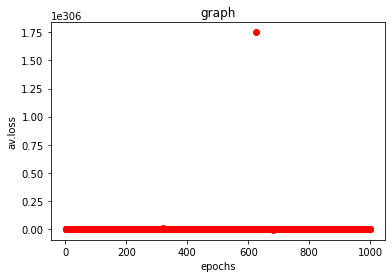

In [ ]:
# ye plotting
# Visualize the training progress using Matplotlib. Plot the epochs on the x-axis and the average loss on the y-axis.
plt.title("graph")
plt.xlabel("epochs")
plt.ylabel("av.loss")
avloss = np.empty(epoch)

#calculate the av loss per epoch
for i in range(epoch):
  for j in range(100):
    avloss[i] = avloss[i] + loss[i*100+j]
  avloss[i] = avloss[i] / 100
print(len(avloss))
print(avloss)
#plt.scatter(100000, 100000, color ="red")
epoch_new = np.empty(epoch)
for y in range(epoch):
  epoch_new[y] = y+1
plt.scatter(epoch_new, avloss, color ="red") #plots the points (without connection!!!!!)

plt.show()